# Sesión 2 Apartado 2: Evaluación de modelos

Objetivo: Aprender y aplicar métricas: precisión, recall, F1, AUC, matriz de confusión, curvas ROC y PR.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=800, n_features=12, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

## Métricas importantes
- Accuracy (Exactitud): proporción de predicciones correctas.

  Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)

- Precision (Precisión): de las predicciones positivas, la fracción que son verdaderos positivos.

  Formula: Precision = TP / (TP + FP)

- Recall (Sensibilidad o Exhaustividad): de los positivos reales, la fracción que el modelo detecta.

  Formula: Recall = TP / (TP + FN)

- F1-score: media armónica de precision y recall.

  Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)

- TPR / FPR (componentes de la curva ROC):
  - TPR (True Positive Rate) = Recall = TP / (TP + FN)
  - FPR (False Positive Rate) = FP / (FP + TN)

- ROC AUC: área bajo la curva ROC. No hay una fórmula cerrada simple — se calcula numéricamente como la integral del TPR respecto a FPR a través de umbrales.

- Matriz de confusión: tabla 2x2 con conteos:

  | Predicho 0 | Predicho 1 |
  |------------|------------|
  | True Negative (TN) | False Positive (FP) |
  | False Negative (FN) | True Positive (TP) |

- Curva Precision-Recall: relación entre precision y recall para distintos umbrales; útil con clases desbalanceadas.

Usamos `classification_report`, `confusion_matrix`, `roc_auc_score` y visualizaciones para entender el comportamiento del clasificador.

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       124
           1       0.93      0.84      0.88       116

    accuracy                           0.89       240
   macro avg       0.90      0.89      0.89       240
weighted avg       0.90      0.89      0.89       240

ROC AUC: 0.9402113459399332


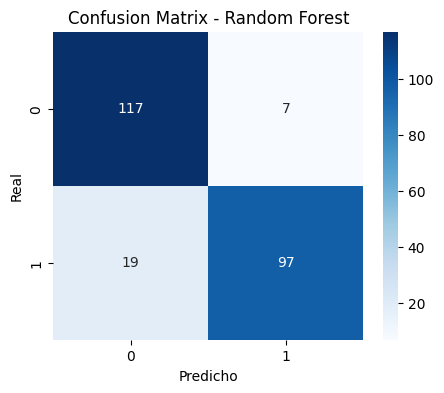

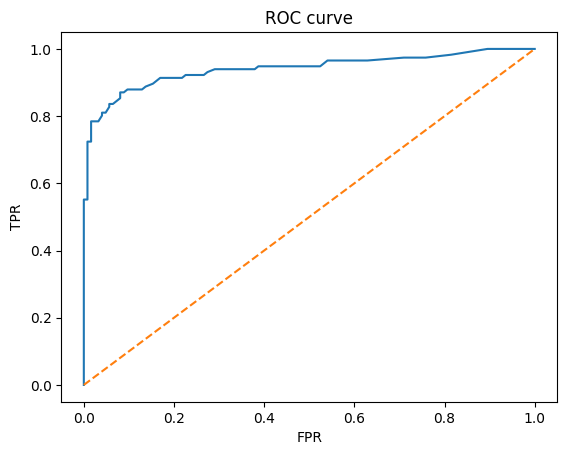

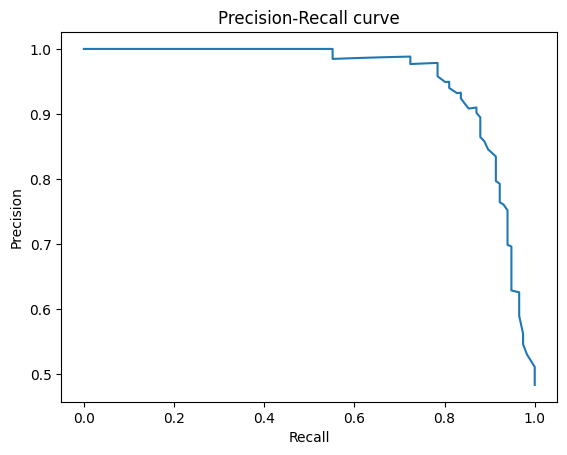

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

print('Classification report:\n')
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Curva ROC y PR (visualización simple)
fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

plt.figure()
plt.plot(recall, precision)
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

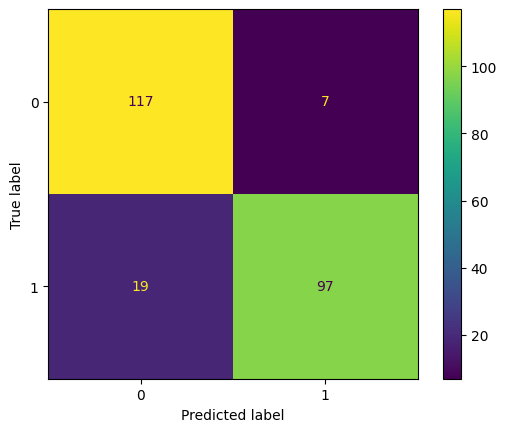

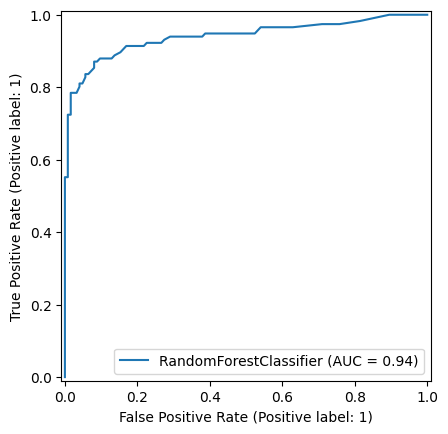

In [3]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay(cm).plot()

RocCurveDisplay.from_estimator(rf, X_test, y_test)

## Overfitting y Underfitting

En el entrenamiento de modelos de Machine Learning podemos encontrarnos con dos problemas clásicos:

 - Underfitting (subajuste): El modelo es demasiado simple y no logra capturar las relaciones de los datos. Tiene mal rendimiento tanto en el conjunto de entrenamiento como en el de prueba.

 - Overfitting (sobreajuste): El modelo es demasiado complejo y se ajusta demasiado a los datos de entrenamiento, incluso al ruido. Tiene alto rendimiento en entrenamiento pero bajo rendimiento en prueba.

La clave es encontrar un equilibrio entre ambos extremos, lo que se conoce como modelo con buen poder de generalización.

Underfitting (depth=1): Train=0.703, Test=0.763
Buen ajuste (depth=5): Train=0.946, Test=0.867
Overfitting (depth=None): Train=1.000, Test=0.887


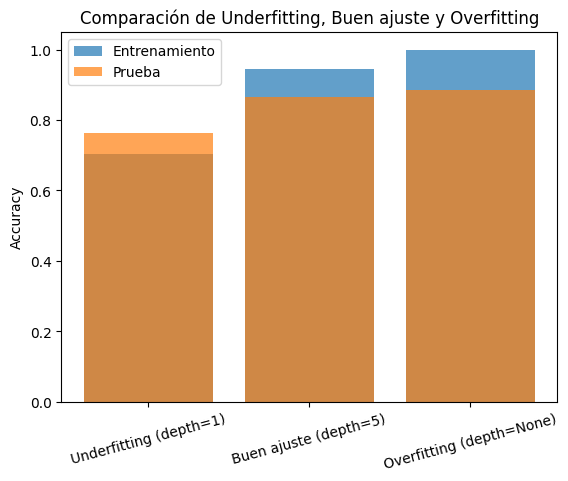

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generamos un dataset sintético
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, n_redundant=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Tres modelos con distinta profundidad
models = {
    "Underfitting (depth=1)": DecisionTreeClassifier(max_depth=1, random_state=42),
    "Buen ajuste (depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Overfitting (depth=None)": DecisionTreeClassifier(max_depth=None, random_state=42),
}

train_scores, test_scores = [], []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    train_scores.append(acc_train)
    test_scores.append(acc_test)

    print(f"{name}: Train={acc_train:.3f}, Test={acc_test:.3f}")

# Visualización de resultados
plt.bar(models.keys(), train_scores, alpha=0.7, label="Entrenamiento")
plt.bar(models.keys(), test_scores, alpha=0.7, label="Prueba")
plt.ylabel("Accuracy")
plt.title("Comparación de Underfitting, Buen ajuste y Overfitting")
plt.xticks(rotation=15)
plt.legend()
plt.show()

## Regularización

Para evitar overfitting, se pueden usar técnicas de regularización:
- L1 (Lasso): añade una penalización proporcional a la suma de los valores absolutos de los coeficientes. Promueve la sparsity (muchos coeficientes en cero).
- L2 (Ridge): añade una penalización proporcional a la suma de los cuadrados de los coeficientes. Tiende a reducir los coeficientes pero no a hacerlos cero.

In [5]:
from sklearn.linear_model import LogisticRegression

model_l1 = LogisticRegression(penalty="l1", solver="liblinear")
model_l2 = LogisticRegression(penalty="l2")

for model in [model_l1, model_l2]:
    model.fit(X_train, y_train)
    print(
        model.penalty,
        "Train:",
        model.score(X_train, y_train),
        "Test:",
        model.score(X_test, y_test),
    )

l1 Train: 0.8285714285714286 Test: 0.8033333333333333
l2 Train: 0.8257142857142857 Test: 0.8066666666666666


## Visualización de curvas de validación y aprendizaje

Las curvas de validación y aprendizaje nos ayudan a diagnosticar el rendimiento de un modelo:

- Curva de aprendizaje: muestra cómo varía el rendimiento a medida que aumentamos el número de ejemplos de entrenamiento.

    - Si la curva de validación está muy por debajo de la de entrenamiento → overfitting.

    - Si ambas curvas están bajas → underfitting.

    - Si ambas están altas y cercanas → buen ajuste.

- Curva de validación: muestra cómo afecta un hiperparámetro (por ejemplo, la profundidad de un árbol) al rendimiento en entrenamiento y validación. Sirve para encontrar el valor óptimo que equilibra sesgo y varianza.

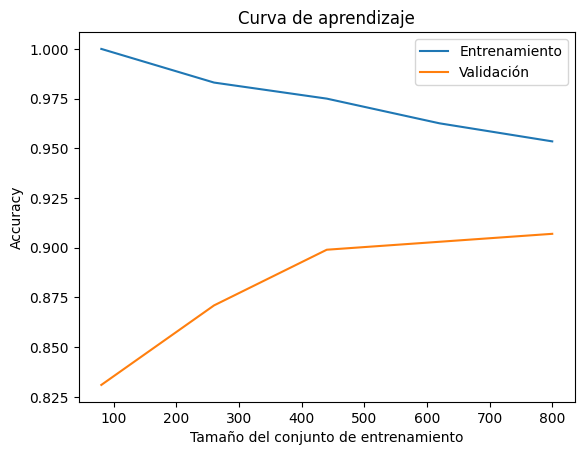

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

rf = RandomForestClassifier(max_depth=5, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    rf,
    X,
    y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Entrenamiento")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Curva de aprendizaje")
plt.show()

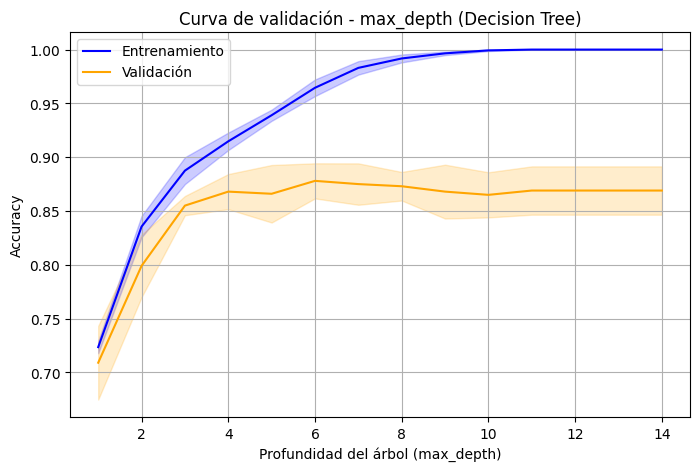

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

# Dataset sintético
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=5, random_state=42
)

# Modelo base
model = DecisionTreeClassifier(random_state=42)

# Rango de valores a evaluar para max_depth
param_range = np.arange(1, 15)

# Calculamos las curvas de validación
train_scores, val_scores = validation_curve(
    model,
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
)

# Promedios y desviaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Graficamos
plt.figure(figsize=(8, 5))
plt.plot(param_range, train_mean, label="Entrenamiento", color="blue")
plt.plot(param_range, val_mean, label="Validación", color="orange")
plt.fill_between(
    param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.fill_between(
    param_range, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2
)

plt.title("Curva de validación - max_depth (Decision Tree)")
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

## Interpretación de modelos

La interpretación de modelos busca entender cómo y por qué un modelo toma decisiones. Es clave en contextos profesionales porque:

- Permite identificar qué variables son más importantes (ejemplo: feature importance en Random Forest).

- Aumenta la confianza en el uso del modelo (útil en ámbitos regulados como finanzas, salud o educación).

- Ayuda a detectar sesgos y mejorar el modelo.

Herramientas comunes:

- Feature importance (árboles y ensembles).

- Coeficientes (en regresión lineal/logística).

- Métodos avanzados: SHAP y LIME, que explican el impacto de cada variable en predicciones individuales.

In [9]:
import pandas as pd
import numpy as np

rf = models["Buen ajuste (depth=5)"]
importances = rf.feature_importances_

pd.DataFrame({"feature": np.arange(X.shape[1]), "importance": importances}).sort_values(
    "importance", ascending=False
)

,feature,importance
10,10,0.303760
9,9,0.283302
4,4,0.183189
15,15,0.115858
18,18,0.062898
5,5,0.018852
0,0,0.015869
2,2,0.006406
11,11,0.006182
3,3,0.002203


<class 'numpy.ndarray'> 30


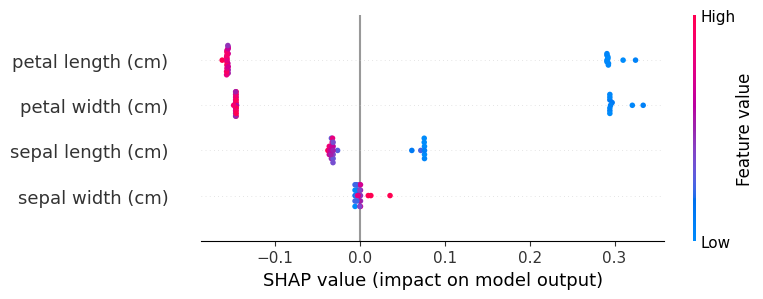

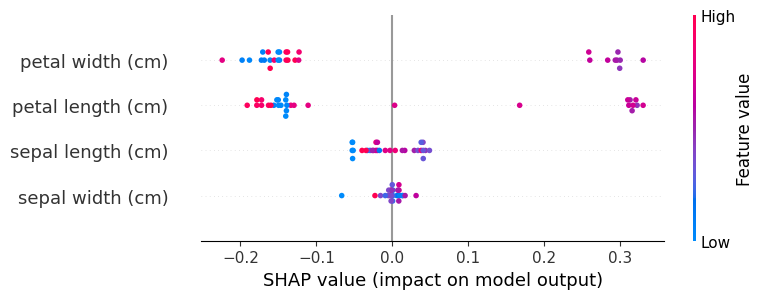

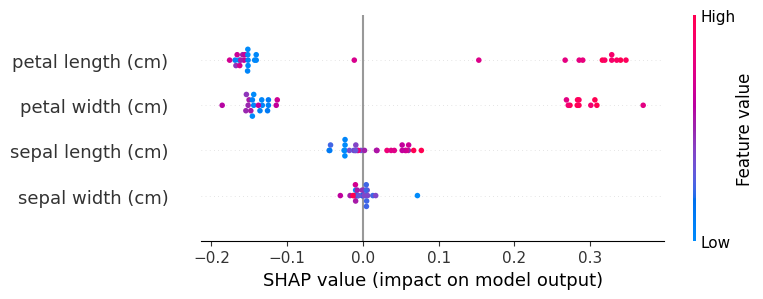

In [18]:
import shap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dataset
X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Explicador SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# shap_values es una lista (una por cada clase)
print(type(shap_values), len(shap_values))

# Ejemplo: mostrar explicaciones de la clase 0 ("setosa")
shap.summary_plot(shap_values[:, :, 0], X_test, feature_names=X_test.columns)
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X_test.columns)
shap.summary_plot(shap_values[:, :, 2], X_test, feature_names=X_test.columns)